In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [14]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


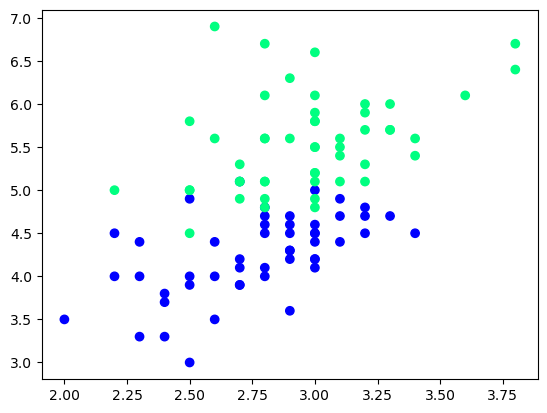

In [17]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [18]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [20]:
df_train

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
94,2.7,4.2,1
113,2.5,5.0,2
78,2.9,4.5,1
141,3.1,5.1,2
62,2.2,4.0,1
109,3.6,6.1,2
142,2.7,5.1,2
81,2.4,3.7,1
56,3.3,4.7,1


In [21]:
df_val

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
135,3.0,6.1,2
111,2.7,5.3,2
91,3.0,4.6,1
88,3.0,4.1,1


In [22]:
df_test

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
144,3.3,5.7,2
116,3.0,5.5,2
139,3.1,5.4,2
80,2.4,3.8,1


In [23]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [24]:
X_test

array([[2.5, 4.9],
       [3. , 6.1],
       [2.7, 5.3],
       [3. , 4.6],
       [3. , 4.1]])

In [25]:
y_test

array([1, 2, 2, 1, 1])

# Case1 - Bagging

In [26]:
df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
109,3.6,6.1,2
56,3.3,4.7,1
81,2.4,3.7,1
113,2.5,5.0,2
78,2.9,4.5,1
76,2.8,4.8,1
76,2.8,4.8,1


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [31]:
dt_bag1 = DecisionTreeClassifier()

In [43]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

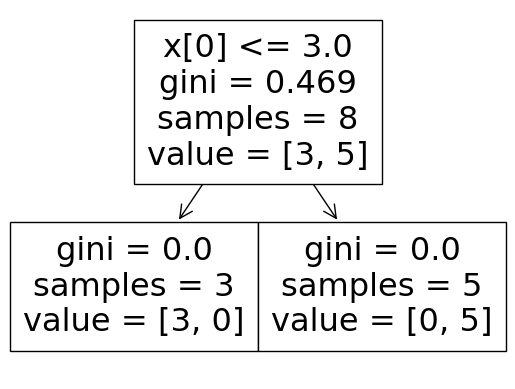

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


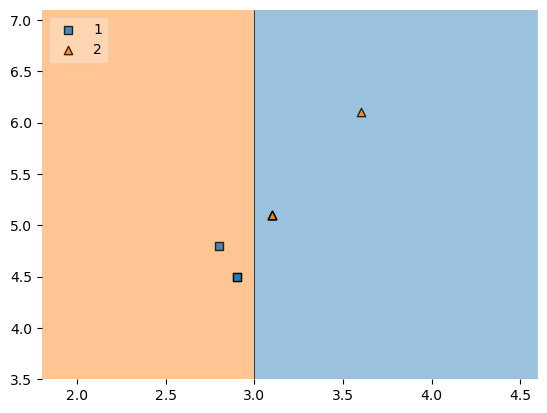

In [44]:
evaluate(dt_bag1,X,y)

In [45]:
df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
113,2.5,5.0,2
109,3.6,6.1,2
94,2.7,4.2,1
141,3.1,5.1,2
56,3.3,4.7,1
56,3.3,4.7,1
62,2.2,4.0,1
78,2.9,4.5,1


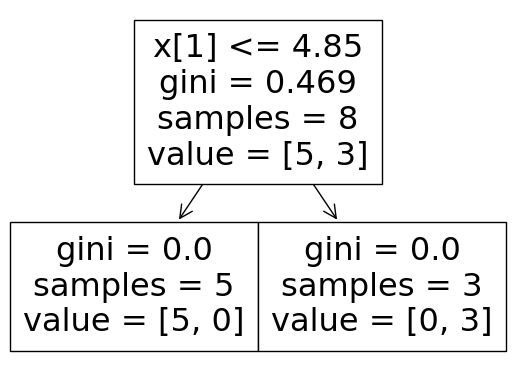

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


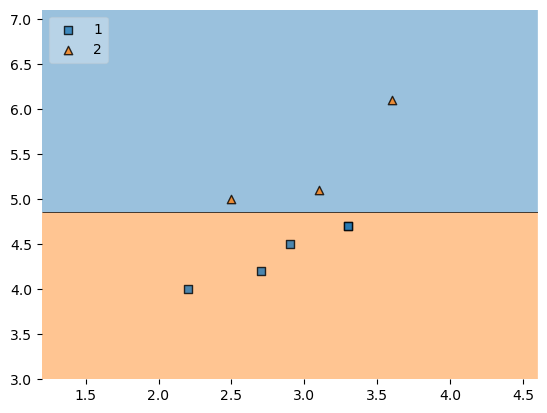

In [46]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [47]:
df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
141,3.1,5.1,2
62,2.2,4.0,1
78,2.9,4.5,1
62,2.2,4.0,1
76,2.8,4.8,1
56,3.3,4.7,1
113,2.5,5.0,2
109,3.6,6.1,2


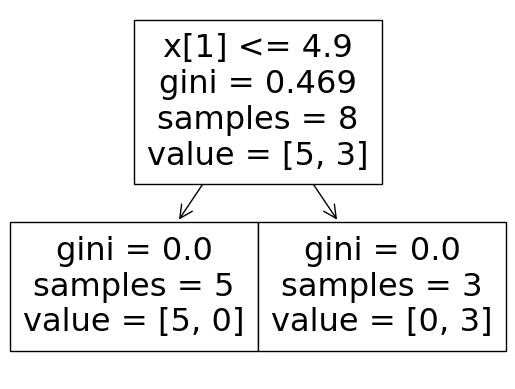

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


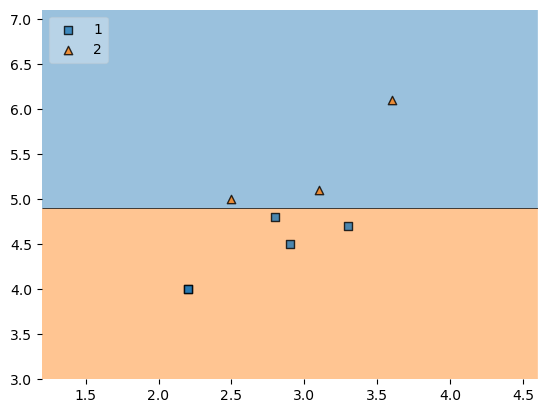

In [48]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

# Predict

In [50]:
df_test

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
144,3.3,5.7,2
116,3.0,5.5,2
139,3.1,5.4,2
80,2.4,3.8,1


In [53]:
dt_bag1.fit(X,y)
dt_bag2.fit(X,y)
dt_bag3.fit(X,y)

DecisionTreeClassifier()

In [54]:
print("Predictor 1",dt_bag1.predict(np.array([2.7,5.1]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.7,5.1]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.7,5.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
